In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fitsio
from astropy.table import Table, hstack

from desispec.io import read_spectra

# set global plotting variables
sns.set(style='white', context='paper', palette='Set1')
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.grid.which"] = 'both'
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['ytick.minor.size'] = 2

In [20]:
datadir = '/global/cfs/cdirs/desi/users/nrfran/speclens/old' # NOTE: DELETE THE "OLD" once new outputs exist

lensCoadd = os.path.join(datadir, 'coadd-lenses.fits')
sourceCoadd = os.path.join(datadir, 'coadd-source.fits')
lensFastSpecFile = os.path.join(datadir, 'fastspec-lenses.fits')
rrLensFile = os.path.join(datadir, 'redrock-lenses.fits')
rrSourceFile = os.path.join(datadir, 'redrock-source.fits')

lensSpec = read_spectra(lensCoadd)
sourceSpec = read_spectra(sourceCoadd)
rrLens = Table(fitsio.read(rrLensFile))
rrSource = Table(fitsio.read(rrSourceFile))

INFO:spectra.py:291:read_spectra: iotime 6.928 sec to read coadd-lenses.fits at 2023-03-27T16:27:11.421586
INFO:spectra.py:291:read_spectra: iotime 6.524 sec to read coadd-source.fits at 2023-03-27T16:27:19.048026


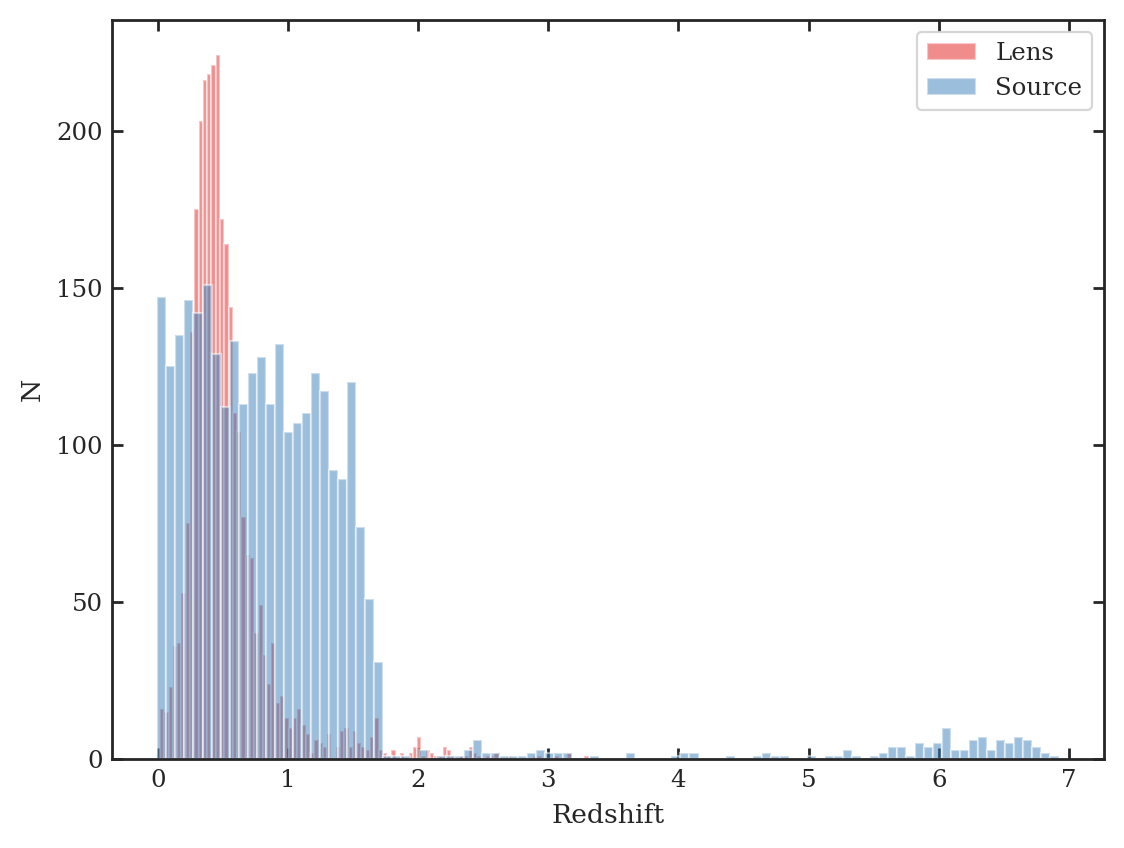

In [23]:
# histogram all the lens redshifts and source redshifts

fig, ax =  plt.subplots()

b = 100
a = 0.5

# lens redshifts
ax.hist(rrLens['Z'], bins=b, alpha=a, label='Lens')

# source redshifts
ax.hist(rrSource['Z'], bins=b, alpha=a, label='Source')

ax.set_ylabel('N')
ax.set_xlabel('Redshift')
ax.legend()